# Tugas Mata Kuliah Deep Learning

### **Nama:** Ahmad Zaki  
### **NIM:** 225150201111025  
### **Dosen Pengampu:** Pak Rijal  

---

## **Judul Tugas: Deteksi Botnet Menggunakan Deep Learning**

### **Deskripsi Singkat:**
Pada tugas ini, dilakukan implementasi deep learning untuk mendeteksi aktivitas botnet menggunakan dataset CTU-13. Proses dimulai dengan analisis data, preprocessing, hingga pembuatan model deep learning. Model yang digunakan adalah Fully Connected Neural Network (FCNN) yang dilatih dengan data dari file `capture20110811.binetflow`.

---

### **Tujuan Tugas:**
1. Memahami proses pembuatan model deep learning dari awal hingga akhir.
2. Mengimplementasikan teknik preprocessing seperti feature scaling dan data sampling.
3. Melakukan eksperimen pada data jaringan untuk mendeteksi botnet menggunakan deep learning.

---

### **Tahapan Pengerjaan:**
1. Data Understanding
2. Exploratory Data Analysis (EDA)
3. Preprocessing dan Feature Engineering
4. Modeling dan Evaluasi
5. Sampling dengan Teknik SMOTE

---

### **Tools yang Digunakan:**
- Python (Libraries: TensorFlow, pandas, numpy, matplotlib, seaborn)
- Jupyter Notebook
- Dataset CTU-13



Data Understanding dan Preliminary Analysis

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from imblearn.combine import SMOTETomek
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('../dl-b-project/2/capture20110811.binetflow')

In [13]:
print("Dataset Overview:")
print(df.head())

Dataset Overview:
                    StartTime       Dur Proto       SrcAddr  Sport    Dir  \
0  2011/08/11 09:53:40.240135  9.016532   tcp  31.96.153.11  60257     ->   
1  2011/08/11 09:55:01.054702  2.903761   tcp  83.228.37.92   2571     ->   
2  2011/08/11 09:55:02.677188  3.032142   tcp  83.228.37.92   2574     ->   
3  2011/08/11 09:55:04.307051  2.932428   tcp  83.228.37.92   2576     ->   
4  2011/08/11 09:55:03.958463  6.017523   tcp  83.228.37.92   2571     ->   

         DstAddr  Dport   State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.229    443  SRA_SA   0.0   0.0        7       508       208   
1  147.32.84.229  13363   SR_SA   0.0   0.0        3       184       122   
2  147.32.84.229    443   SR_SA   0.0   0.0        3       184       122   
3  147.32.84.229     80   SR_SA   0.0   0.0        3       184       122   
4  147.32.84.229  13363   SR_SA   0.0   0.0        3       184       122   

                             Label  
0  flow=Background-TCP-Es

In [14]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808122 entries, 0 to 1808121
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 206.9+ MB
None


In [15]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                Dur          sTos          dTos       TotPkts      TotBytes  \
count  1.808122e+06  1.803798e+06  1.538287e+06  1.808122e+06  1.808122e+06   
mean   4.006726e+02  2.970399e-02  3.510398e-04  3.973805e+01  3.503811e+04   
std    9.516550e+02  2.297207e+00  2.970989e-02  4.073724e+03  4.190502e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    3.140000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    2.147000e-03  0.000000e+00  0.000000e+00  2.000000e+00  2.610000e+02   
75%    8.996974e+00  0.000000e+00  0.000000e+00  5.000000e+00  5.870000e+02   
max    3.600034e+03  1.920000e+02  3.000000e+00  4.077379e+06  4.376239e+09   

           SrcBytes  
count  1.808122e+06  
mean   2.210684e+03  
std    3.034949e+05  
min    0.000000e+00  
25%    7.900000e+01  
50%    8.500000e+01  
75%    3.100000e+02  
max    2.485222e+08  


In [16]:
print("\nUnique Labels in 'Label':")
print(df['Label'].value_counts())


Unique Labels in 'Label':
Label
flow=To-Background-UDP-CVUT-DNS-Server                                     660177
flow=Background-UDP-Established                                            602264
flow=Background-UDP-Attempt                                                201380
flow=Background-TCP-Established                                            149962
flow=Background-Established-cmpgw-CVUT                                      78133
                                                                            ...  
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-60                                 1
flow=From-Botnet-V43-TCP-HTTP-Not-Encrypted-Down-2                              1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-5         1
flow=From-Botnet-V43-TCP-Established-HTTP-Binary-Download-Custom-Port-7         1
flow=From-Botnet-V43-TCP-Established-HTTP-Ad-23                                 1
Name: count, Length: 132, dtype: int64


In [17]:
df.isnull().sum()

StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          3993
Dir               0
DstAddr           0
Dport          2973
State             0
sTos           4324
dTos         269835
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64

Data Cleaning

In [18]:
def clean_data(df):
    """
    Membersihkan dataset dari missing values, outliers, dan data yang tidak valid
    """
    print("Jumlah data awal:", len(df))
    
    # 1. Handling Missing Values
    print("\nMissing values sebelum cleaning:")
    print(df.isnull().sum())
    
    # Fill missing values
    df['Sport'] = df['Sport'].fillna('unknown')
    df['Dport'] = df['Dport'].fillna('unknown')
    df['sTos'] = df['sTos'].fillna(df['sTos'].median())
    df['dTos'] = df['dTos'].fillna(df['dTos'].median())
    
    # 2. Remove Invalid Values
    # Remove rows where Dur is negative
    df = df[df['Dur'] >= 0]
    
    # Remove rows where TotBytes is 0 but TotPkts is not 0
    df = df[~((df['TotBytes'] == 0) & (df['TotPkts'] > 0))]
    
    # Remove rows where SrcBytes > TotBytes
    df = df[df['SrcBytes'] <= df['TotBytes']]
    
    # 3. Handle Outliers
    # Using IQR method for numerical columns
    numeric_cols = ['Dur', 'TotPkts', 'TotBytes', 'SrcBytes']
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR  # Using 3 instead of 1.5 to be less aggressive
        upper_bound = Q3 + 3 * IQR
        
        # Cap the outliers instead of removing them
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    # 4. Data Validation
    # Ensure all numeric columns are positive
    for col in numeric_cols:
        df[col] = df[col].abs()
    
    # 5. Convert Label ke format biner
    df['Label'] = df['Label'].apply(lambda x: 1 if 'Botnet' in x else 0)
    
    # 6. Remove duplicates if any
    df = df.drop_duplicates()
    
    print("\nMissing values setelah cleaning:")
    print(df.isnull().sum())
    print("\nJumlah data setelah cleaning:", len(df))
    
    # 7. Print class distribution
    print("\nDistribusi kelas setelah cleaning:")
    print(df['Label'].value_counts(normalize=True) * 100)
    
    return df

Feature Engineering

In [19]:
def enhanced_feature_engineering(df):
    # Time-based features
    df['StartTime'] = pd.to_datetime(df['StartTime'])
    df['Hour'] = df['StartTime'].dt.hour
    df['Day'] = df['StartTime'].dt.day
    df['Month'] = df['StartTime'].dt.month
    df['DayOfWeek'] = df['StartTime'].dt.dayofweek
    df['IsWeekend'] = df['StartTime'].dt.dayofweek.isin([5, 6]).astype(int)
    
    # Traffic-based features
    df['BytesPerPacket'] = df['TotBytes'] / df['TotPkts'].replace(0, 1)
    df['BytesPerSecond'] = df['TotBytes'] / df['Dur'].replace(0, 1)
    df['PacketsPerSecond'] = df['TotPkts'] / df['Dur'].replace(0, 1)
    df['SrcBytesRatio'] = df['SrcBytes'] / df['TotBytes'].replace(0, 1)
    
    # Interaction features
    df['BytePacketRatio'] = df['BytesPerPacket'] * df['PacketsPerSecond']
    df['DurByteRatio'] = df['Dur'] * df['BytesPerSecond']
    
    # Protocol and State encoding using target encoding
    for col in ['Proto', 'State', 'Dir']:
        temp_dict = df.groupby(col)['Label'].mean()
        df[f'{col}_encoded'] = df[col].map(temp_dict)
    
    return df

Data Preprocessing

In [20]:
def preprocess_data(df):
    # Select features for model
    features = [
        'Dur', 'Proto_encoded', 'State_encoded', 'Dir_encoded',
        'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
        'Hour', 'Day', 'Month', 'DayOfWeek', 'IsWeekend',
        'BytesPerPacket', 'BytesPerSecond', 'PacketsPerSecond',
        'SrcBytesRatio', 'BytePacketRatio', 'DurByteRatio'
    ]
    
    # Feature selection using mutual information
    selector = SelectKBest(score_func=mutual_info_classif, k=15)
    X = selector.fit_transform(df[features], df['Label'])
    selected_features = np.array(features)[selector.get_support()]
    
    # Robust scaling
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, df['Label'], selected_features, scaler

Create Deep Learning Model

In [21]:
def create_improved_model(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim,
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    # Learning rate scheduler
    initial_learning_rate = 0.001
    decay_steps = 1000
    decay_rate = 0.9
    learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps, decay_rate
    )
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy',
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.AUC()]
    )
    
    return model

Training with K-Fold Cross Validation

In [22]:
def train_with_kfold(X, y, n_splits=5):
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    histories = []
    models = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
        print(f'\nFold {fold + 1}/{n_splits}')
        
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Apply SMOTETomek
        smote_tomek = SMOTETomek(random_state=42)
        X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)
        
        # Calculate class weights
        class_weights = dict(enumerate(np.bincount(y_train_balanced).max() / np.bincount(y_train_balanced)))
        
        # Create and train model
        model = create_improved_model(X_train.shape[1])
        
        history = model.fit(
            X_train_balanced, y_train_balanced,
            epochs=20,
            batch_size=256,
            validation_data=(X_val, y_val),
            class_weight=class_weights,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=5,
                    restore_best_weights=True
                ),
                tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    factor=0.2,
                    patience=3,
                    min_lr=1e-6
                )
            ]
        )
        
        histories.append(history.history)
        models.append(model)
    
    return models, histories

Main Pipeline

Jumlah data awal: 1808122

Missing values sebelum cleaning:
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          3993
Dir               0
DstAddr           0
Dport          2973
State             0
sTos           4324
dTos         269835
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64

Missing values setelah cleaning:
StartTime    0
Dur          0
Proto        0
SrcAddr      0
Sport        0
Dir          0
DstAddr      0
Dport        0
State        0
sTos         0
dTos         0
TotPkts      0
TotBytes     0
SrcBytes     0
Label        0
dtype: int64

Jumlah data setelah cleaning: 1808122

Distribusi kelas setelah cleaning:
Label
0    98.841837
1     1.158163
Name: proportion, dtype: float64

Fold 1/5


c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9278 - auc: 0.9807 - loss: 0.1905 - precision: 0.9281 - recall: 0.9275 - val_accuracy: 0.9558 - val_auc: 0.9914 - val_loss: 0.1356 - val_precision: 0.2007 - val_recall: 0.9448 - learning_rate: 3.1023e-04
Epoch 2/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9504 - auc: 0.9913 - loss: 0.1268 - precision: 0.9540 - recall: 0.9464 - val_accuracy: 0.9557 - val_auc: 0.9922 - val_loss: 0.1324 - val_precision: 0.2013 - val_recall: 0.9520 - learning_rate: 9.6241e-05
Epoch 3/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9539 - auc: 0.9924 - loss: 0.1180 - precision: 0.9578 - recall: 0.9497 - val_accuracy: 0.9592 - val_auc: 0.9926 - val_loss: 0.1249 - val_precision: 0.2146 - val_recall: 0.9496 - learning_rate: 2.9857e-05
Epoch 4/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.9549 - auc: 0.9927 - loss: 0.1150 - precision: 0.9591 - recall: 0.9504 - val_accuracy: 0.9593 - val_auc:

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11108/11108 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9290 - auc_1: 0.9810 - loss: 0.1878 - precision_1: 0.9285 - recall_1: 0.9298 - val_accuracy: 0.9545 - val_auc_1: 0.9901 - val_loss: 0.1426 - val_precision_1: 0.1954 - val_recall_1: 0.9382 - learning_rate: 3.1026e-04
Epoch 2/20
11108/11108 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9511 - auc_1: 0.9914 - loss: 0.1262 - precision_1: 0.9552 - recall_1: 0.9465 - val_accuracy: 0.9547 - val_auc_1: 0.9915 - val_loss: 0.1329 - val_precision_1: 0.1973 - val_recall_1: 0.9475 - learning_rate: 9.6261e-05
Epoch 3/20
11108/11108 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9540 - auc_1: 0.9923 - loss: 0.1180 - precision_1: 0.9584 - recall_1: 0.9492 - val_accuracy: 0.9588 - val_auc_1: 0.9917 - val_loss: 0.1254 - val_precision_1: 0.2123 - val_recall_1: 0.9444 - learning_rate: 2.9866e-05
Epoch 4/20
11108/11108 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9552 - auc_1: 0.9926 - loss: 0.1151 - precision_1: 0.9600 - recall_1

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - accuracy: 0.9274 - auc_2: 0.9809 - loss: 0.1899 - precision_2: 0.9259 - recall_2: 0.9295 - val_accuracy: 0.9519 - val_auc_2: 0.9910 - val_loss: 0.1376 - val_precision_2: 0.1882 - val_recall_2: 0.9530 - learning_rate: 3.1029e-04
Epoch 2/20
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 0.9488 - auc_2: 0.9910 - loss: 0.1290 - precision_2: 0.9511 - recall_2: 0.9461 - val_accuracy: 0.9540 - val_auc_2: 0.9919 - val_loss: 0.1313 - val_precision_2: 0.1957 - val_recall_2: 0.9570 - learning_rate: 9.6281e-05
Epoch 3/20
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 0.9522 - auc_2: 0.9920 - loss: 0.1203 - precision_2: 0.9549 - recall_2: 0.9493 - val_accuracy: 0.9597 - val_auc_2: 0.9922 - val_loss: 0.1232 - val_precision_2: 0.2175 - val_recall_2: 0.9551 - learning_rate: 2.9875e-05
Epoch 4/20
11107/11107 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9532 - auc_2: 0.9923 - loss: 0.1174 - precision_2: 0.9559 - recall_2

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.9279 - auc_3: 0.9814 - loss: 0.1885 - precision_3: 0.9255 - recall_3: 0.9313 - val_accuracy: 0.9552 - val_auc_3: 0.9919 - val_loss: 0.1375 - val_precision_3: 0.1997 - val_recall_3: 0.9534 - learning_rate: 3.1023e-04
Epoch 2/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 0.9494 - auc_3: 0.9909 - loss: 0.1294 - precision_3: 0.9517 - recall_3: 0.9466 - val_accuracy: 0.9581 - val_auc_3: 0.9929 - val_loss: 0.1280 - val_precision_3: 0.2111 - val_recall_3: 0.9556 - learning_rate: 9.6241e-05
Epoch 3/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9525 - auc_3: 0.9919 - loss: 0.1208 - precision_3: 0.9554 - recall_3: 0.9493 - val_accuracy: 0.9601 - val_auc_3: 0.9931 - val_loss: 0.1237 - val_precision_3: 0.2192 - val_recall_3: 0.9546 - learning_rate: 2.9857e-05
Epoch 4/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.9537 - auc_3: 0.9922 - loss: 0.1178 - precision_3: 0.9566 - recall_3

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9274 - auc_4: 0.9802 - loss: 0.1927 - precision_4: 0.9291 - recall_4: 0.9256 - val_accuracy: 0.9565 - val_auc_4: 0.9913 - val_loss: 0.1266 - val_precision_4: 0.2037 - val_recall_4: 0.9489 - learning_rate: 3.1023e-04
Epoch 2/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9501 - auc_4: 0.9912 - loss: 0.1279 - precision_4: 0.9541 - recall_4: 0.9456 - val_accuracy: 0.9581 - val_auc_4: 0.9923 - val_loss: 0.1241 - val_precision_4: 0.2105 - val_recall_4: 0.9518 - learning_rate: 9.6241e-05
Epoch 3/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.9535 - auc_4: 0.9922 - loss: 0.1192 - precision_4: 0.9581 - recall_4: 0.9485 - val_accuracy: 0.9611 - val_auc_4: 0.9927 - val_loss: 0.1194 - val_precision_4: 0.2235 - val_recall_4: 0.9534 - learning_rate: 2.9857e-05
Epoch 4/20
11109/11109 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.9551 - auc_4: 0.9926 - loss: 0.1158 - precision_4: 0.9596 - recall_4

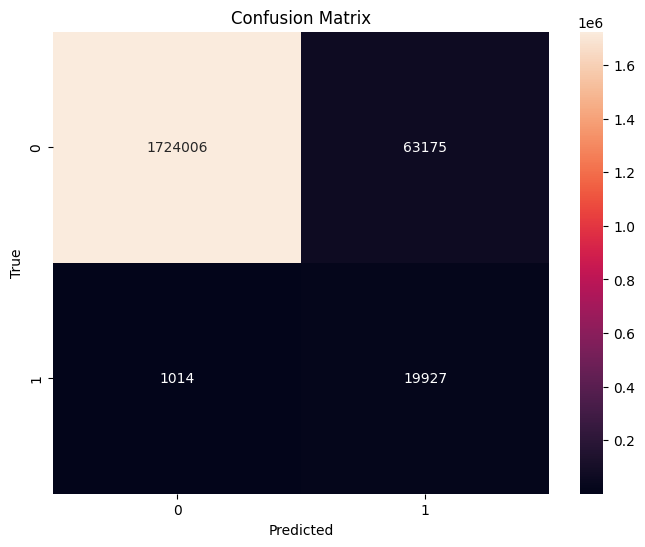

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

<Figure size 1200x400 with 0 Axes>

In [23]:
def main():
    # Load data
    df = pd.read_csv('../dl-b-project/2/capture20110811.binetflow')
    
    # Clean data
    df = clean_data(df)    
    
    # Enhanced feature engineering
    df = enhanced_feature_engineering(df)
    
    # Improved preprocessing
    X, y, selected_features, scaler = preprocess_data(df)
    
    # Train with k-fold cross validation
    models, histories = train_with_kfold(X, y)
    
    # Select best model based on validation metrics
    best_model_idx = np.argmax([h['val_accuracy'][-1] for h in histories])
    best_model = models[best_model_idx]
    
    # Final predictions using best model
    y_pred = (best_model.predict(X) > 0.5).astype(int)
    
    # Print evaluation metrics
    print("\nFinal Classification Report:")
    print(classification_report(y, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Plot average training history
    plt.figure(figsize=(12, 4))
    avg_history = {metric: np.mean([h[metric] for h in histories], axis=0)
                  for metric in histories[0].keys()}
    
    plt.subplot(1, 2, 1)
    plt.plot(avg_history['loss'], label='Training Loss')
    plt.plot(avg_history['val_loss'], label='Validation Loss')
    plt.title('Average Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(avg_history['accuracy'], label='Training Accuracy')
    plt.plot(avg_history['val_accuracy'], label='Validation Accuracy')
    plt.title('Average Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Save best model and preprocessing objects
    best_model.save('best_botnet_detection_model.h5')
    np.save('selected_features.npy', selected_features)
    np.save('scaler.npy', scaler.get_params())
    
    return best_model, scaler, selected_features

if __name__ == "__main__":
    model, scaler, selected_features = main()